In [172]:
from random import random, choice
from matplotlib import pyplot as plt
import numpy as np
import gymnasium as gym

In [173]:
num_episodes = 500
gamma = 1

In [174]:
class LinearSarsa():
    def __init__(self, num_features):
        self.w = np.random.rand(num_features)
        self.iteration = 0
        self.epsilon = 1
        self.alpha = 1

    def _q_hat(self, states, action):
        features = np.append(states, action)
        return np.dot(features, self.w)

    def predict(self, states):
        self.iteration += 1
        self.epsilon = 1 / self.iteration
        self.alpha = 1 / self.iteration

        actions = [0, 1]

        # Policy iteration
        if random() < self.epsilon:
            # Exploration (random)
            return choice(actions)    
        # Greedy
        return 1 if self._q_hat(states, 1) > self._q_hat(states, 0) else 0
        
    def control(self, states, action, reward, next_states):
        # Policy evaluation
        next_action = self.predict(states)

        td_target = reward + gamma * self._q_hat(next_states, next_action)
        td_error = td_target - self._q_hat(states, action)
        features = np.append(states, action)
        delta = self.alpha * td_error * features

        # Update parameters
        self.w += delta

In [175]:
env_name = "CartPole-v1"
# env = gym.make(env_name, render_mode="human") # Visible
env = gym.make(env_name)

sarsa = LinearSarsa(5)


try:
    rewards = []
    for ep in range(num_episodes):
        observation, info = env.reset()

        for time in range(1000):
            action = sarsa.predict(observation)
            next_observation, reward, terminated, truncated, info = env.step(action)
            
            if terminated or truncated:
                rewards.append(time + 1)
                break
 
            sarsa.control(observation, action, reward, next_observation)
            observation = next_observation
finally:
    env.close()

In [176]:
env = gym.make(env_name, render_mode="human") # Visible
try:
    observation, info = env.reset()
    action = sarsa.predict(observation)

    for _ in range(1000):
        next_observation, reward, terminated, truncated, info = env.step(action)
        
        if terminated or truncated:
            break

        next_action = sarsa.predict(next_observation)
        sarsa.control(observation, action, reward, next_observation)
finally:
    env.close()

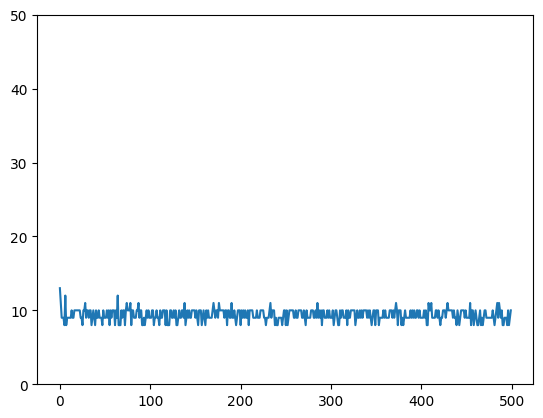

In [177]:
plt.plot(rewards)
plt.ylim(0, 50)
plt.show()